## Bike sharing assignment

### Problem Statement

##### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


##### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##### Company wants to know
      
      . Which variables are significant in predicting the demand for shared bikes.
      . How well those variables describe the bike demands


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extra
import warnings
warnings.filterwarnings(action='ignore')

### Step - 1 : Reading and understanding data

In [83]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [84]:
df.shape

(730, 16)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [86]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [87]:
#dropping instant column as it is like index column
df.drop(['instant'],axis=1,inplace=True)

In [88]:
#Dropping dteday as it is date
df.drop(['dteday'],axis=1,inplace=True)

In [89]:
#Removing casual and registered as cnt is sum of these two column
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

In [90]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [92]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [93]:
#changing categorical data to more meaningful data
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [94]:
cont_cols = ["temp","atemp","hum","windspeed"]
cat_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
target = ["cnt"]

### Visualising data
### Univariate analysis

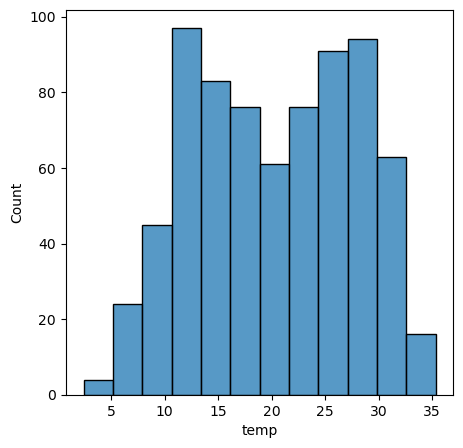

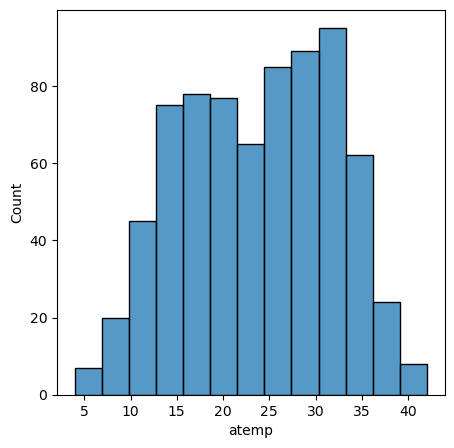

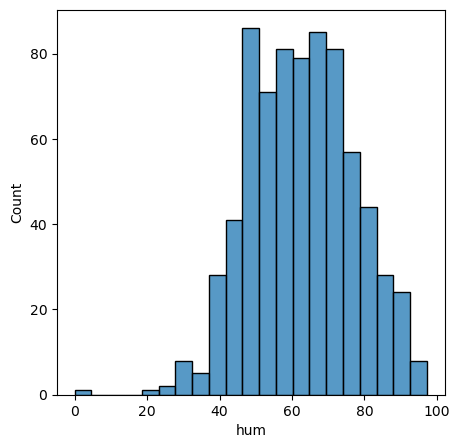

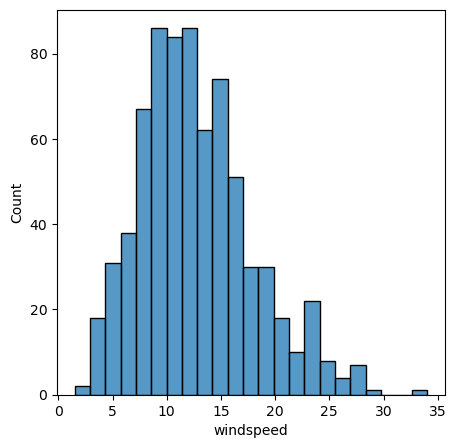

In [96]:

for i in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.histplot(x=df[i])
    plt.show()

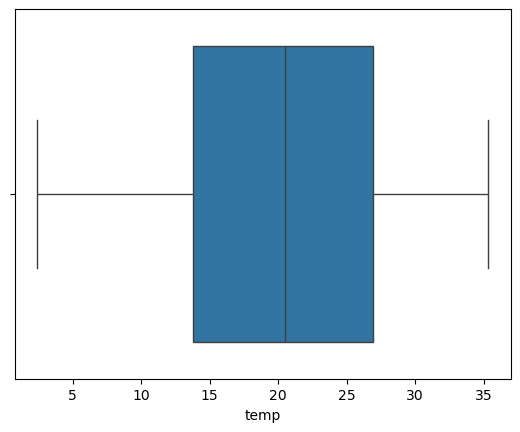

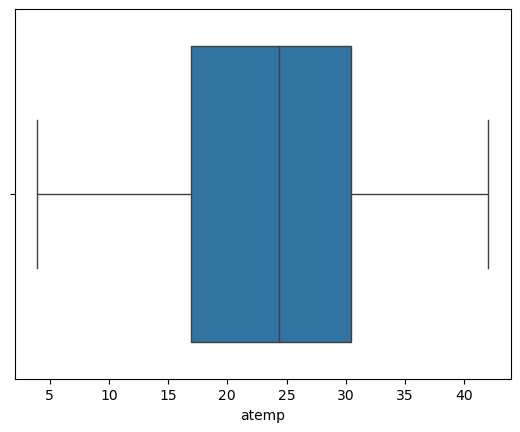

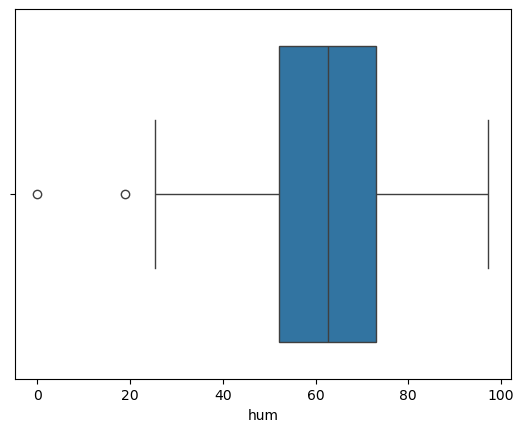

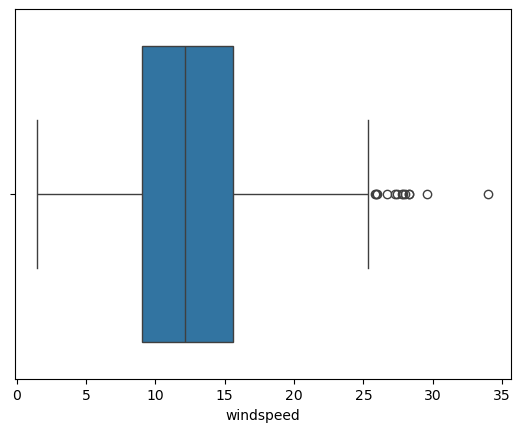

In [97]:
for i in cont_cols:
    sns.boxplot(x=df[i])
    plt.show()

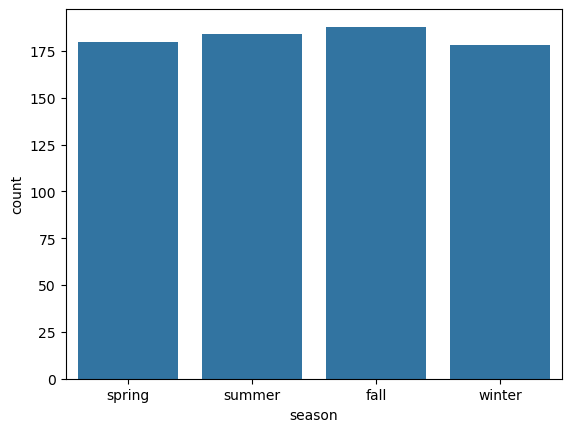

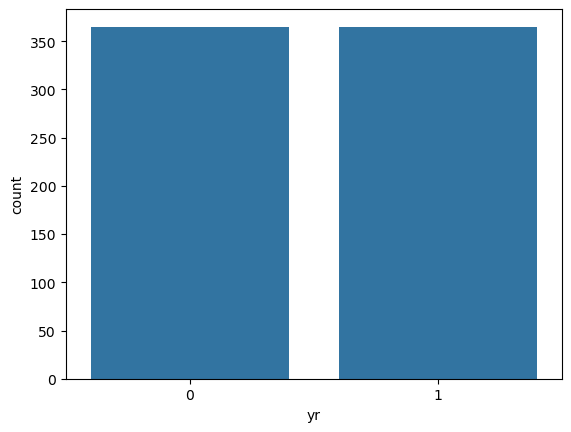

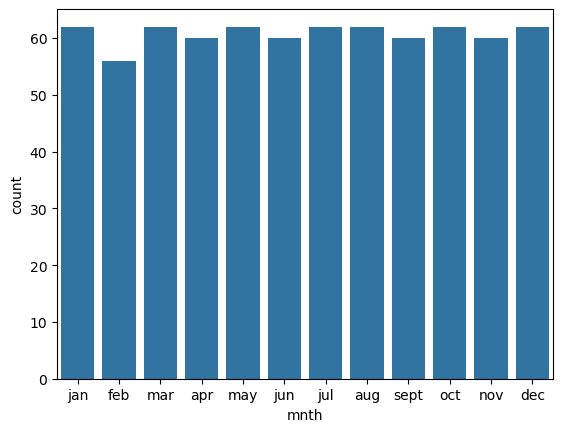

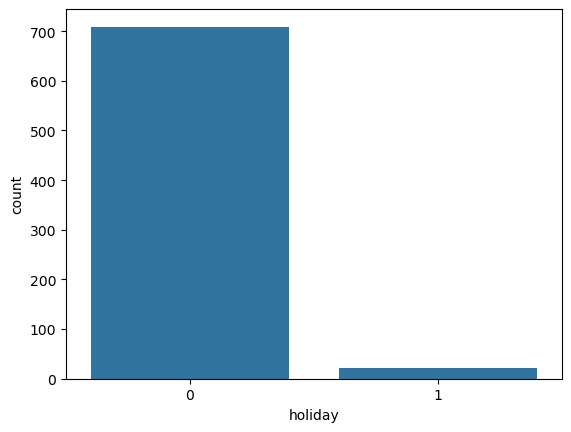

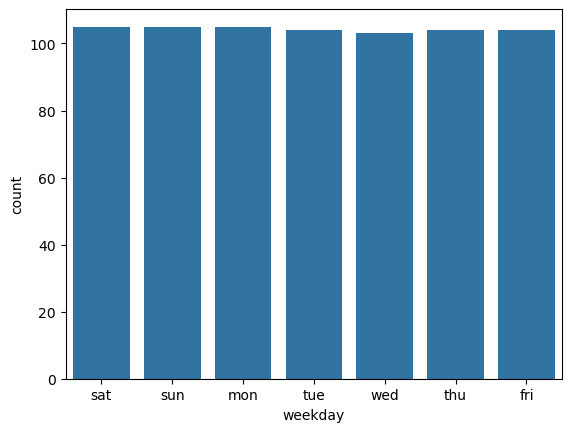

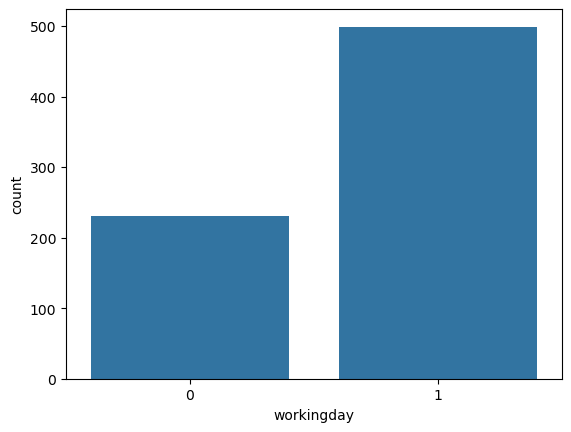

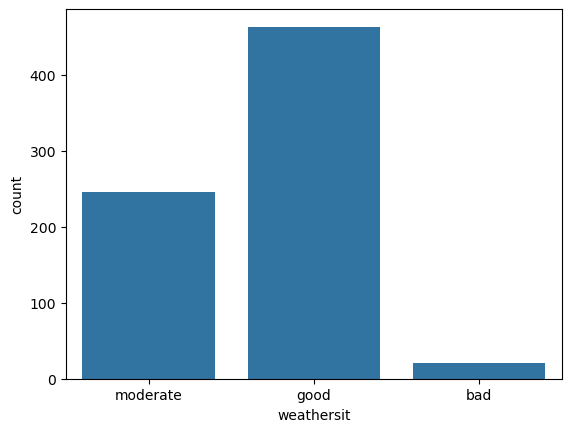

In [98]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

### Bivariate Analysis 

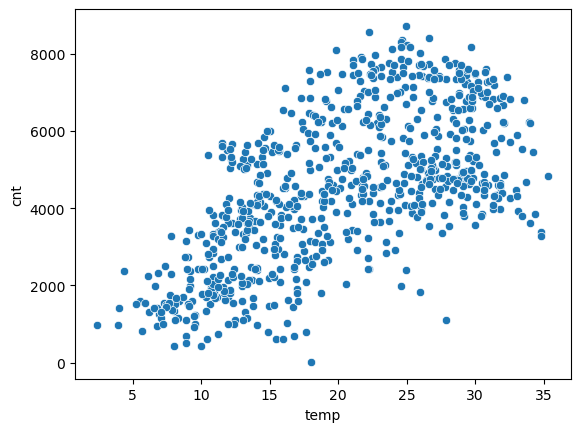

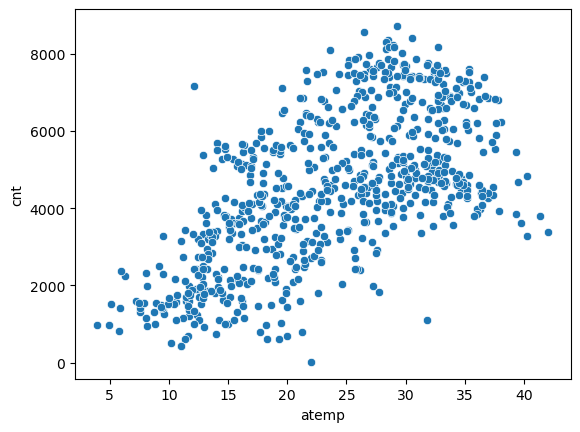

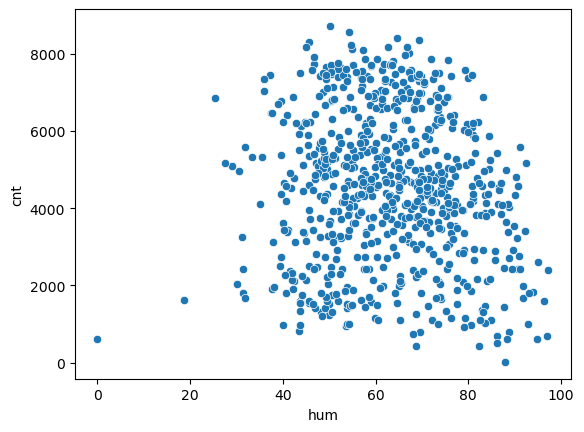

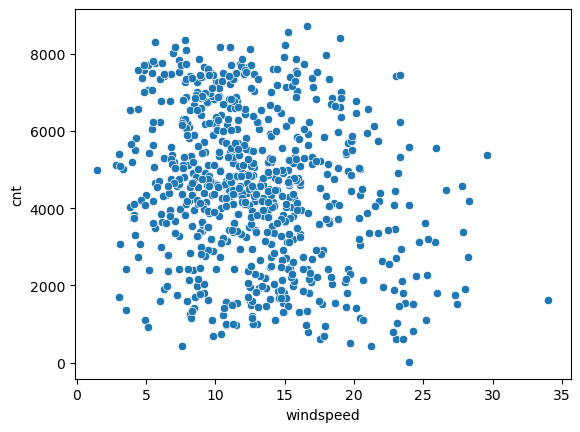

In [99]:
for i in cont_cols:
    sns.scatterplot(x=df[i],y=df["cnt"])
    plt.show()

<Figure size 2000x200 with 0 Axes>

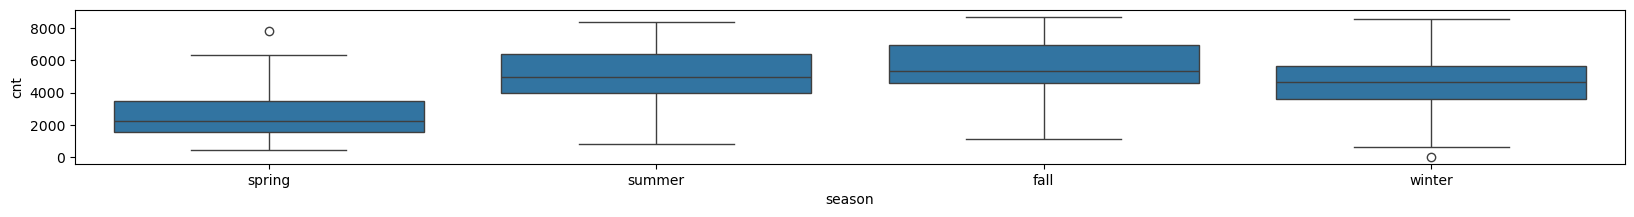

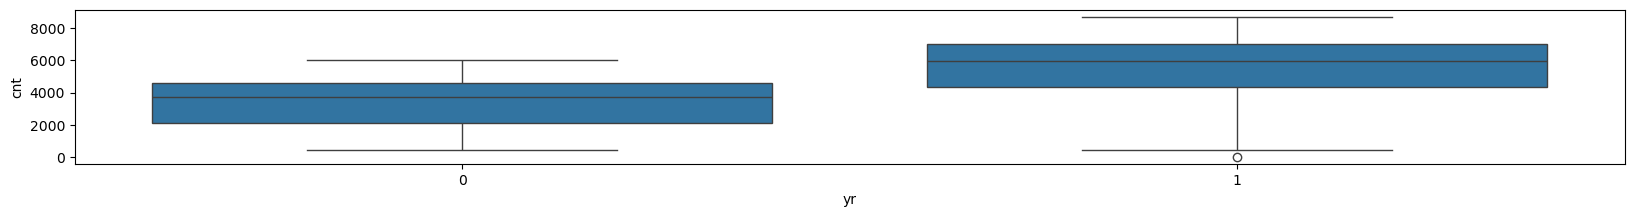

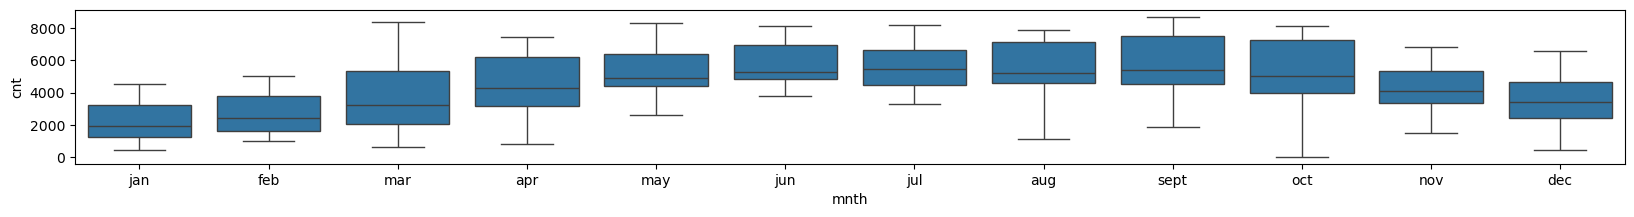

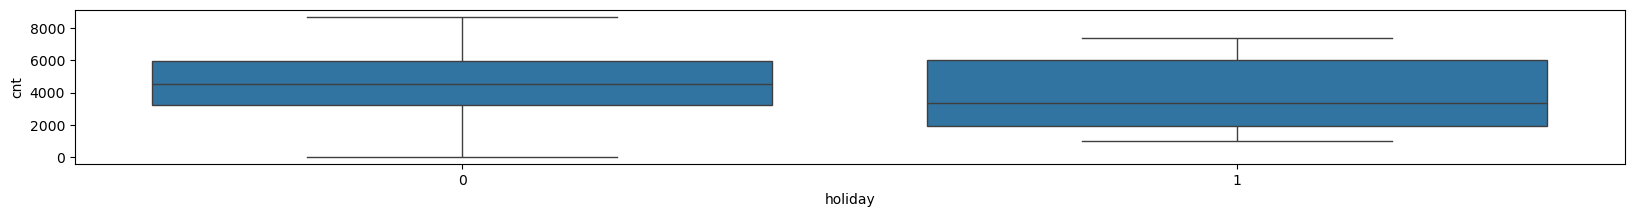

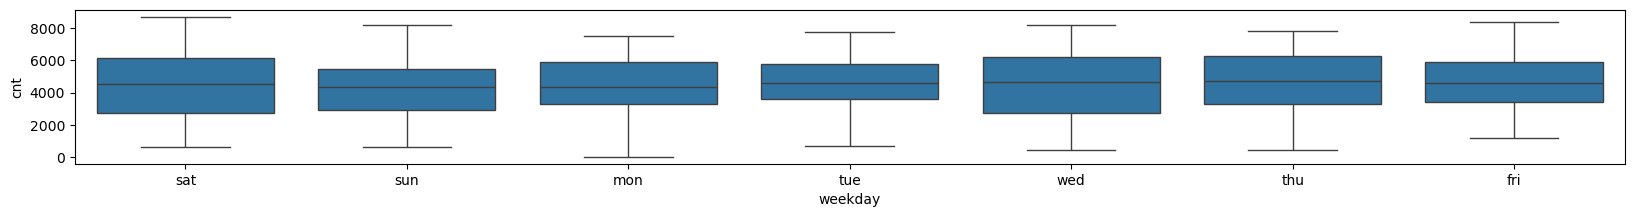

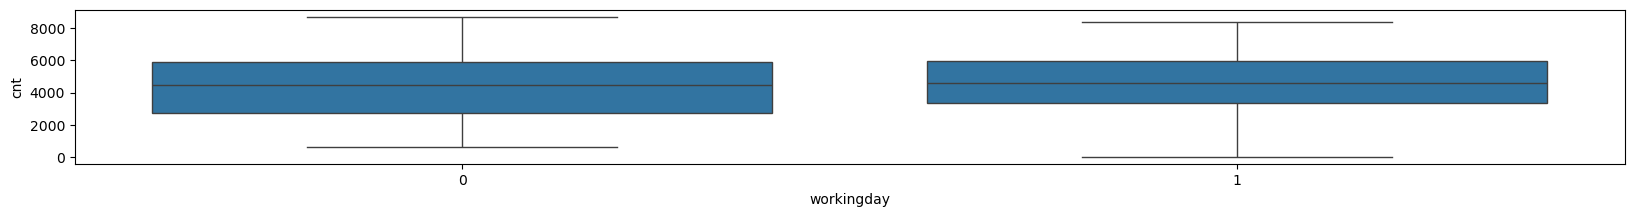

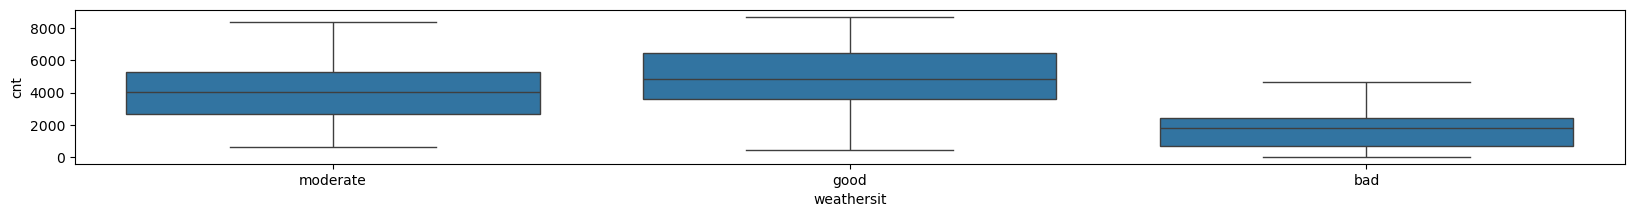

In [100]:
plt.figure(figsize=(20,2))
for i in cat_cols:
    plt.figure(figsize=(20,2))
    sns.boxplot(x=df[i],y=df["cnt"])    
    plt.show()

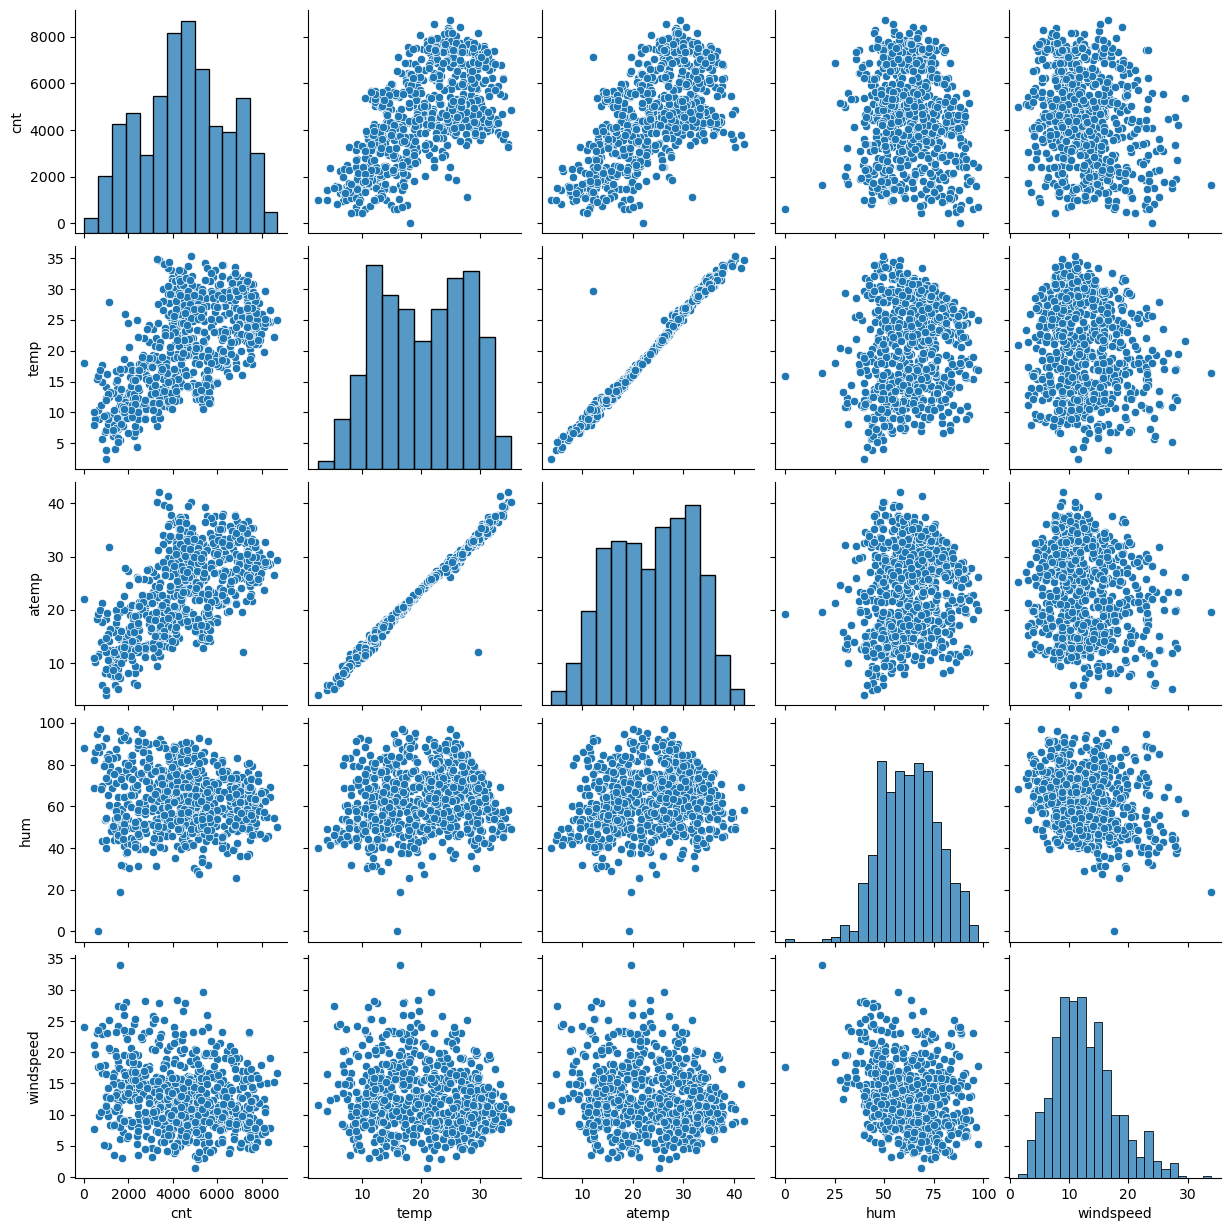

In [101]:
cont_cols1 = ["cnt","temp","atemp","hum","windspeed"]
sns.pairplot(df[cont_cols1])
plt.show()

### Multivariate Analysis 

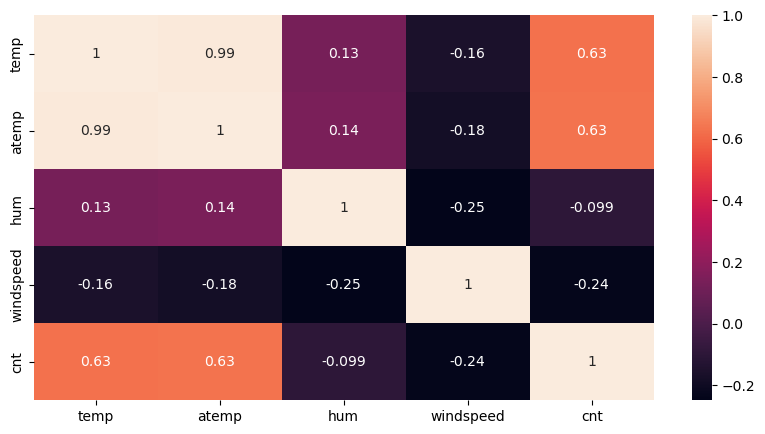

In [102]:
plt.figure(figsize=(10,5))
sns.heatmap(df[cont_cols+["cnt"]].corr(),annot=True,)
plt.show()

### Step-2 : Data preparation
### Dummy variable creation

In [103]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [104]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [105]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,True,False,True,False


In [106]:
df.shape

(730, 31)

## Step-3 : Splitting data into train test set 

In [107]:
X=df.drop(["cnt"],axis=1)
y=df["cnt"]

In [108]:
X.columns = X.columns.astype(str)

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [113]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((584, 30), (146, 30), (584,), (146,))

In [114]:
#Standardization train set
X_train=(X_train-X_train.mean())/X_train.std()

In [115]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
367,0.972135,-0.167693,0.704687,-1.882464,-2.131745,-1.350708,2.234862,1.722701,-0.571588,-0.576856,...,-0.29559,-0.418032,-0.420851,-0.426467,-0.395181,2.544813,-0.426467,-0.167693,0.765475,-0.721070
648,0.972135,-0.167693,0.704687,-0.306487,-0.240948,-1.192918,-0.119042,-0.579490,-0.571588,1.730567,...,-0.29559,-0.418032,-0.420851,-0.426467,2.526155,-0.392283,-0.426467,-0.167693,0.765475,-0.721070
44,-1.026903,-0.167693,0.704687,-0.417082,-0.444464,-1.818132,2.902856,1.722701,-0.571588,-0.576856,...,-0.29559,2.388067,-0.420851,-0.426467,-0.395181,-0.392283,-0.426467,-0.167693,0.765475,-0.721070
705,0.972135,-0.167693,0.704687,-0.937801,-0.918211,0.956630,-0.771166,-0.579490,-0.571588,1.730567,...,-0.29559,-0.418032,-0.420851,-0.426467,-0.395181,-0.392283,-0.426467,-0.167693,-1.304142,1.384454
379,0.972135,-0.167693,-1.416639,-1.790299,-1.912521,-1.508497,0.771778,1.722701,-0.571588,-0.576856,...,-0.29559,-0.418032,-0.420851,2.340831,-0.395181,-0.392283,-0.426467,-0.167693,0.765475,-0.721070


In [116]:
#Standardization test set
X_test=(X_test-X_test.mean())/X_test.std()

In [117]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,-0.892733,5.292150,-1.710488,1.101193,1.021559,0.137062,-1.429568,-0.538549,-0.612188,-0.527995,...,-0.311568,2.657519,-0.361774,-0.337223,-0.452986,-0.463878,-0.311568,-0.187665,-1.360142,1.469362
535,1.112483,-0.187665,0.580624,1.393399,1.349884,-0.165012,-0.999233,-0.538549,1.622298,-0.527995,...,-0.311568,-0.373714,-0.361774,-0.337223,-0.452986,-0.463878,3.187585,-0.187665,0.730182,-0.675906
299,-0.892733,-0.187665,0.580624,-0.242093,-0.209828,1.290418,0.118115,-0.538549,-0.612188,1.880984,...,-0.311568,-0.373714,-0.361774,-0.337223,2.192453,-0.463878,-0.311568,-0.187665,-1.360142,1.469362
221,-0.892733,-0.187665,0.580624,1.310535,1.137186,-1.271680,0.151322,-0.538549,-0.612188,-0.527995,...,-0.311568,-0.373714,-0.361774,-0.337223,-0.452986,-0.463878,3.187585,-0.187665,0.730182,-0.675906
152,-0.892733,-0.187665,0.580624,1.040132,0.894651,-2.057063,1.376185,-0.538549,1.622298,-0.527995,...,-0.311568,-0.373714,-0.361774,-0.337223,2.192453,-0.463878,-0.311568,-0.187665,0.730182,-0.675906


## Step-4 : Model building
## Feature selection

In [118]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True, False])

In [119]:
selected_features=X_train.columns[selector.support_]

In [120]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 367 to 520
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               584 non-null    float64
 1   holiday          584 non-null    float64
 2   temp             584 non-null    float64
 3   hum              584 non-null    float64
 4   windspeed        584 non-null    float64
 5   season_spring    584 non-null    float64
 6   season_summer    584 non-null    float64
 7   season_winter    584 non-null    float64
 8   mnth_dec         584 non-null    float64
 9   mnth_jul         584 non-null    float64
 10  mnth_nov         584 non-null    float64
 11  mnth_sept        584 non-null    float64
 12  weekday_sun      584 non-null    float64
 13  weathersit_bad   584 non-null    float64
 14  weathersit_good  584 non-null    float64
dtypes: float64(15)
memory usage: 73.0 KB


In [122]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [123]:
X_train_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_jul,mnth_nov,mnth_sept,weekday_sun,weathersit_bad,weathersit_good
367,1.0,0.972135,-0.167693,-1.882464,-1.350708,2.234862,1.722701,-0.571588,-0.576856,-0.309065,-0.285205,-0.29559,-0.29559,-0.426467,-0.167693,0.765475
648,1.0,0.972135,-0.167693,-0.306487,-1.192918,-0.119042,-0.579490,-0.571588,1.730567,-0.309065,-0.285205,-0.29559,-0.29559,-0.426467,-0.167693,0.765475
44,1.0,-1.026903,-0.167693,-0.417082,-1.818132,2.902856,1.722701,-0.571588,-0.576856,-0.309065,-0.285205,-0.29559,-0.29559,-0.426467,-0.167693,0.765475
705,1.0,0.972135,-0.167693,-0.937801,0.956630,-0.771166,-0.579490,-0.571588,1.730567,3.230029,-0.285205,-0.29559,-0.29559,-0.426467,-0.167693,-1.304142
379,1.0,0.972135,-0.167693,-1.790299,-1.508497,0.771778,1.722701,-0.571588,-0.576856,-0.309065,-0.285205,-0.29559,-0.29559,2.340831,-0.167693,0.765475


In [41]:
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_jul,mnth_nov,mnth_sept,weekday_sun,weathersit_bad,weathersit_good
184,1.0,-0.892733,5.292150,1.101193,0.137062,-1.429568,-0.538549,-0.612188,-0.527995,-0.28447,2.657519,-0.311568,-0.311568,-0.337223,-0.187665,-1.360142
535,1.0,1.112483,-0.187665,1.393399,-0.165012,-0.999233,-0.538549,1.622298,-0.527995,-0.28447,-0.373714,-0.311568,-0.311568,-0.337223,-0.187665,0.730182
299,1.0,-0.892733,-0.187665,-0.242093,1.290418,0.118115,-0.538549,-0.612188,1.880984,-0.28447,-0.373714,-0.311568,-0.311568,-0.337223,-0.187665,-1.360142
221,1.0,-0.892733,-0.187665,1.310535,-1.271680,0.151322,-0.538549,-0.612188,-0.527995,-0.28447,-0.373714,-0.311568,-0.311568,-0.337223,-0.187665,0.730182
152,1.0,-0.892733,-0.187665,1.040132,-2.057063,1.376185,-0.538549,1.622298,-0.527995,-0.28447,-0.373714,-0.311568,-0.311568,-0.337223,-0.187665,0.730182


In [124]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     222.1
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          4.60e-226
Time:                        22:07:01   Log-Likelihood:                -4692.4
No. Observations:                 584   AIC:                             9417.
Df Residuals:                     568   BIC:                             9487.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4505.2671     31.339    143.760      0.000    4443.713    4566.821
yr                984.5919     31.870     30.894      0.000     921.994    1047.189
holiday          -148.5593     31.899     -4.657      0.000    -211.214     -85.904
temp              992.2259     62.448     15.889      0.000     869.569    1114.883
hum              -194.3651     43.832     -4.434      0.000    -280.458    -108.272
windspeed        -261.8250     34.295     -7.634      0.000    -329.186    -194.464
season_spring    -274.5333     72.735     -3.774      0.000    -417.396    -131.671
season_summer     173.0795     51.397      3.367      0.001      72.127     274.032
season_winter     431.5846     59.310      7.277      0.000     315.091     548.078
mnth_dec          -90.1285     36.541     -2.466      0.014    -161.901     -18.356
mnth_jul         -123.4889     38.527     -3.205      0.001    -199.162     -47.816
mnth_nov         -113.6570     40.302     -2.820      0.005    -192.817     -34.497
mnth_sept         160.5231     36.097      4.447      0.000      89.624     231.422
weekday_sun      -163.6617     31.631     -5.174      0.000    -225.790    -101.534
weathersit_bad   -279.6013     33.177     -8.428      0.000    -344.766    -214.436
weathersit_good   242.0581     40.428      5.987      0.000     162.652     321.464
==============================================================================
Omnibus:                       85.931   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.232
Skew:                          -0.729   Prob(JB):                     3.06e-52
Kurtosis:                       5.761   Cond. No.                         5.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.032418
2,holiday,1.034311
3,temp,3.963948
4,hum,1.952881
5,windspeed,1.195542
6,season_spring,5.377479
7,season_summer,2.685185
8,season_winter,3.575579
9,mnth_dec,1.357252


In [127]:
#dropping season_spring because of high VIF
X_train_sm=X_train_sm.drop(["season_spring"],axis=1)
X_test_sm=X_test_sm.drop(["season_spring"],axis=1)

In [128]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     231.5
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          3.28e-224
Time:                        22:08:10   Log-Likelihood:                -4699.6
No. Observations:                 584   AIC:                             9429.
Df Residuals:                     569   BIC:                             9495.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4505.2671     31.701    142.115      0.000    4443.001    4567.533
yr                976.0328     32.157     30.352      0.000     912.872    1039.194
holiday          -155.4691     32.215     -4.826      0.000    -218.744     -92.194
temp             1169.3084     41.691     28.047      0.000    1087.421    1251.196
hum              -209.7284     44.148     -4.751      0.000    -296.441    -123.016
windspeed        -272.8320     34.567     -7.893      0.000    -340.726    -204.938
season_summer     309.3133     37.015      8.356      0.000     236.611     382.016
season_winter     588.1767     42.875     13.718      0.000     503.964     672.389
mnth_dec          -70.5812     36.591     -1.929      0.054    -142.451       1.289
mnth_jul          -95.3126     38.235     -2.493      0.013    -170.411     -20.214
mnth_nov          -81.4020     39.842     -2.043      0.041    -159.657      -3.147
mnth_sept         200.8091     34.882      5.757      0.000     132.297     269.321
weekday_sun      -164.1270     31.997     -5.129      0.000    -226.973    -101.281
weathersit_bad   -273.8025     33.525     -8.167      0.000    -339.651    -207.954
weathersit_good   230.2802     40.774      5.648      0.000     150.195     310.366
==============================================================================
Omnibus:                       74.058   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.774
Skew:                          -0.686   Prob(JB):                     5.01e-38
Kurtosis:                       5.276   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.027191
2,holiday,1.030904
3,temp,1.726566
4,hum,1.936041
5,windspeed,1.186897
6,season_summer,1.360970
7,season_winter,1.826021
8,mnth_dec,1.329989
9,mnth_jul,1.452140


### Step-5 : Residual analysis


In [129]:
y_train_pred = res2.predict(X_train_sm)

<Axes: ylabel='Density'>

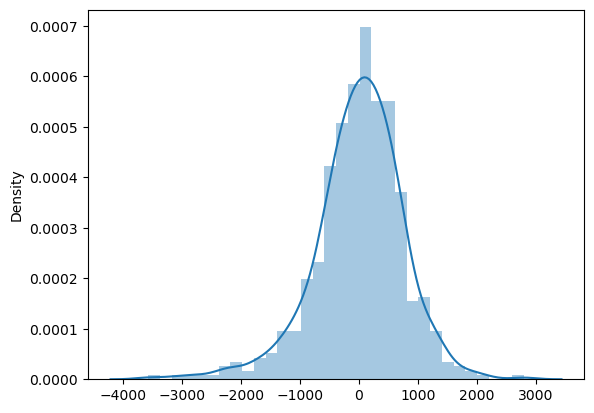

In [130]:
residual = y_train - y_train_pred
sns.distplot(residual)

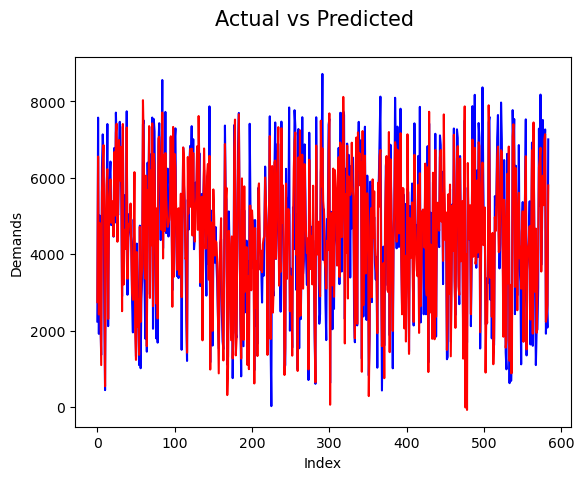

In [131]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_sm),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Step - 6 : Evaluation on test set

In [133]:
model3=sm.OLS(y_test,X_test_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     44.01
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.43e-42
Time:                        22:09:39   Log-Likelihood:                -1177.9
No. Observations:                 146   AIC:                             2386.
Df Residuals:                     131   BIC:                             2430.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4518.9658     67.426     67.021      0.000    4385.581    4652.350
yr               1061.2623     70.592     15.034      0.000     921.615    1200.910
holiday             8.3768     69.539      0.120      0.904    -129.188     145.941
temp             1053.1939     93.972     11.208      0.000     867.296    1239.092
hum              -412.7576    102.242     -4.037      0.000    -615.016    -210.499
windspeed         -86.5834     77.216     -1.121      0.264    -239.335      66.168
season_summer     253.4539     84.209      3.010      0.003      86.868     420.040
season_winter     578.7957    101.454      5.705      0.000     378.096     779.496
mnth_dec         -195.8893     81.344     -2.408      0.017    -356.807     -34.972
mnth_jul          -12.7125     91.575     -0.139      0.890    -193.869     168.444
mnth_nov          -99.0583     96.562     -1.026      0.307    -290.081      91.965
mnth_sept         240.7620     80.967      2.974      0.004      80.590     400.934
weekday_sun        55.2875     70.470      0.785      0.434     -84.119     194.694
weathersit_bad   -100.7533     77.480     -1.300      0.196    -254.027      52.520
weathersit_good    74.7058     94.146      0.794      0.429    -111.538     260.950
==============================================================================
Omnibus:                        6.946   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.552
Skew:                          -0.479   Prob(JB):                       0.0378
Kurtosis:                       3.400   Cond. No.                         3.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_test_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_test_sm.values,i) for i in range(len(X_test_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.088608
2,holiday,1.056370
3,temp,1.929099
4,hum,2.283593
5,windspeed,1.302494
6,season_summer,1.549110
7,season_winter,2.248529
8,mnth_dec,1.445480
9,mnth_jul,1.831944


In [136]:
y_test_pred = res3.predict(X_test_sm)

In [137]:
r2_score(y_test, y_test_pred)

0.8246511412731607

### Step - 7 : Conclusion :

#### Equation of best fitted line is: 

###### cnt = 1061.2623 X yr + 8.3768 X holiday + 1053.1939 X temp - 412.7576 X hum - 86.5834 X windspeed + 253.4539 X season_summer + 578.7957 X season_winter - 195.8893 X mnth_dec - 12.7125 X mnth_jul - 99.0583 mnth_nov + 240.7620 X mnth_sept + 55.2875 X weekday_sun - 100.7533 X weathersit_bad + 74.7058 x weathersit_good